# 图像分割

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imagesegmentation as ist

## 孤立点检测

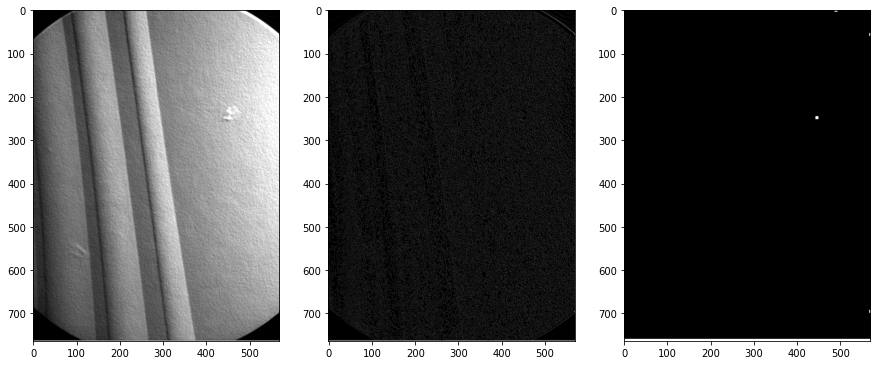

In [2]:
_, axe = plt.subplots(1, 3, figsize = (15, 8))

img = cv.imread('./image/Fig1004(b)(turbine_blade_black_dot).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img, cmap = 'gray')

img_l = cv.Laplacian(img, -1)
axe[1].imshow(img_l, cmap = 'gray')

r_img = (img_l > np.max(np.abs(img_l)) * 0.90).astype(np.float64)

#孤立点看不清，所以对图像进行膨胀操作
kernel = np.ones((7, 7))
r_img = cv.dilate(r_img, kernel)
axe[2].imshow(r_img, cmap = 'gray')

## 线检测

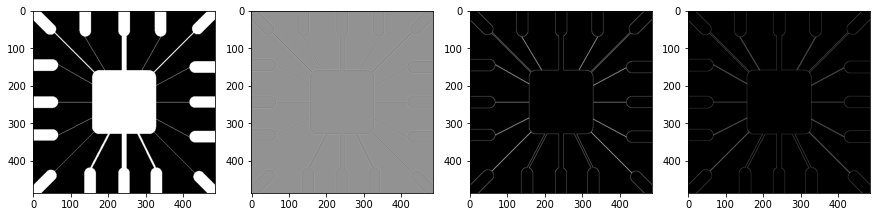

In [3]:
_, axe = plt.subplots(1, 4, figsize = (15, 8))

img = cv.imread('./image/Fig1005(a)(wirebond_mask).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img, cmap = 'gray')

img_l = cv.Laplacian(img, cv.CV_64F)
axe[1].imshow(img_l, cmap = 'gray')

img_l_a = np.abs(img_l)
axe[2].imshow(img_l_a, cmap = 'gray')

img_p = (img_l > 0).astype(int) * img_l
axe[3].imshow(img_p, cmap = 'gray')

## 边缘检测

### Sobel核

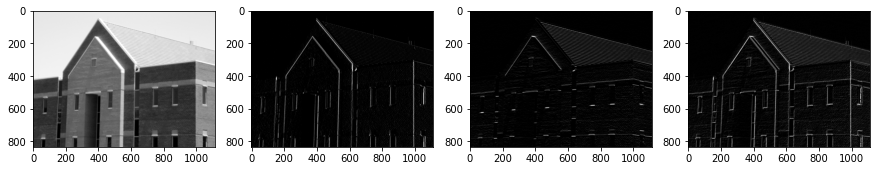

In [4]:
_, axe = plt.subplots(1, 4, figsize = (15, 8))

img = cv.imread('./image/Fig1016(a)(building_original).tif', cv.IMREAD_GRAYSCALE)

#平滑处理
img = cv.blur(img, (5, 5))
axe[0].imshow(img, cmap = 'gray')

img_gx = cv.Sobel(img, -1, 1, 0)
axe[1].imshow(img_gx, cmap = 'gray')

img_gy = cv.Sobel(img, -1, 0, 1)
axe[2].imshow(img_gy, cmap = 'gray')

img_gxy = np.abs(img_gx) + np.abs(img_gy)
axe[3].imshow(img_gxy, cmap = 'gray')

### Marr-Hildreth
*按书本的步骤计算效果并不理想*

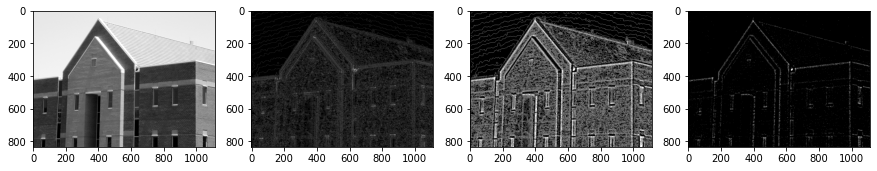

In [28]:
_, axe = plt.subplots(1, 4, figsize = (15, 8))

img = cv.imread('./image/Fig1016(a)(building_original).tif', cv.IMREAD_GRAYSCALE)
axe[0].imshow(img, cmap = 'gray')

img_g = cv.GaussianBlur(img, (25, 25), 4)
img_gl = cv.Laplacian(img_g, cv.CV_64F, 3)

axe[1].imshow(img_gl, cmap = 'gray')

#img_t = ist.findZCP(img_gl, 0, 255)
_, img_t = cv.threshold(img_gl, 0, 255, cv.THRESH_BINARY)
axe[2].imshow(img_t, cmap = 'gray')

#img_t = ist.findZCP(img_gl, np.max(img_gl) * 0.04, 255)
#print(np.max(img_gl) * 0.04)
_, img_t = cv.threshold(img_gl, 2, 255, cv.THRESH_BINARY)
axe[3].imshow(img_t, cmap = 'gray')

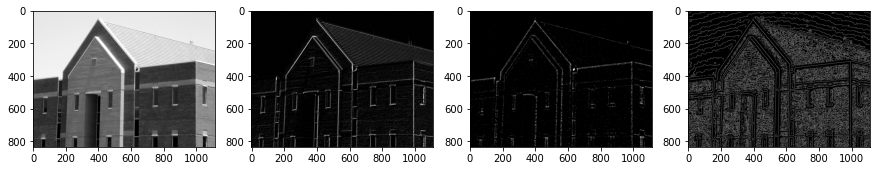

In [32]:
_, axe = plt.subplots(1, 4, figsize = (15, 8))
axe[0].imshow(img, cmap = 'gray')
axe[1].imshow(img_gxy, cmap = 'gray')
axe[2].imshow(img_t, cmap = 'gray')

img_c = cv.Canny(img_g, 0.04, 0.1)
axe[3].imshow(img_c, cmap = 'gray')